## Notebook that takes dihadron ntuples and plots kinematics distributions also with MC

In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time

import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams['figure.figsize'] = 6.2,3.5
mpl.rcParams['axes.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize']= 13

Welcome to JupyROOT 6.15/01


In [50]:
df = {}
df['Pb']= read_root('Pairs_Pb.root', 'Pb')
df['Pb_mix'] = read_root('Pairs_Pb.root', 'Pb_mix')
df['Pb_trigger'] = read_root('Pairs_Pb.root', 'Pb_trigger')
df['D_Pb']= read_root('Pairs_Pb.root', 'D_Pb')
df['D_Pb_mix'] = read_root('Pairs_Pb.root', 'D_Pb_mix')
df['D_Pb_trigger'] = read_root('Pairs_Pb.root', 'D_Pb_trigger')

df['Fe']= read_root('Pairs_Fe.root', 'Fe')
df['Fe_mix'] = read_root('Pairs_Fe.root', 'Fe_mix')
df['Fe_trigger'] = read_root('Pairs_Fe.root', 'Fe_trigger')
df['D_Fe']= read_root('Pairs_Fe.root', 'D_Fe')
df['D_Fe_mix'] = read_root('Pairs_Fe.root', 'D_Fe_mix')
df['D_Fe_trigger'] = read_root('Pairs_Fe.root', 'D_Fe_trigger')

df['C']= read_root('Pairs_C.root', 'C')
df['C_mix'] = read_root('Pairs_C.root', 'C_mix')
df['C_trigger'] = read_root('Pairs_C.root', 'C_trigger')
df['D_C']= read_root('Pairs_C.root', 'D_C')
df['D_C_mix'] = read_root('Pairs_C.root', 'D_C_mix')
df['D_C_trigger'] = read_root('Pairs_C.root', 'D_C_trigger')

#df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']]) #simply combine the deuterium results for all targets
#df['D_mix'] = pd.concat([df['D_Pb_mix'],df['D_Fe_mix'],df['D_C_mix']]) #simply combine the deuterium results for all targets
#df['D_trigger'] = pd.concat([df['D_Pb_trigger'],df['D_Fe_trigger'],df['D_C_trigger']]) #simply combine the deuterium results for all targets


In [48]:
def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' (%2.2f '%(100.0*cutDataframe.shape[0]/nbeforecut), '%)'
    return cutDataframe
def applyCuts(fullDataframe,name='default',isMC=False): 
    dataframe = fullDataframe
    print '/////////////////////////////////////'
    print 'Entries before cut ', dataframe.shape[0]
    dataframe.eval('inelasticity = Nu/5.014', inplace=True)
    dataframe.eval('E = z*Nu', inplace=True)
    dataframe.eval('E_asso = z_asso*Nu', inplace=True)
    dataframe.eval('P = sqrt(E*E-0.140*0.140)', inplace=True)
    dataframe.eval('P_asso = sqrt(E_asso*E_asso-0.140*0.140)', inplace=True)

    #event-level cuts    
    dataframe = applyCut(dataframe, 'Q2>1.0', 'Q2>1.0 :')
    #dataframe = applyCut(dataframe, 'W>2.0', 'W>2.0 :')
    dataframe = applyCut(dataframe, 'inelasticity < 0.85','inelasticity < 0.85')

    #hadron level cuts
    dataframe = applyCut(dataframe, 'z>0.5 and z<1.0', '0.5<z<1.0 :')
    dataframe = applyCut(dataframe, 'P <2.5 ', 'P<2.5 ')
    dataframe = applyCut(dataframe, 'P_asso <2.5 ', 'P_asso<2.5 ')
    print '/////////////////////////////////////'

    
    return dataframe

def printMeans(dataframe):   
    for variable in ['Q2','Xb','Nu','z','z_asso','P','P_asso']:
        print variable
        print 'Average ' + variable , np.mean(dataframe[variable]) , ' min--max ' , np.min(dataframe[variable]), np.max(dataframe[variable])
        print dataframe[variable].quantile([0.25,0.5,0.75])
  

    print 'Pairs with Leading pi+', dataframe.query('pid==211').shape[0]
    print 'Pairs with Leading pi-', dataframe.query('pid==-211').shape[0]
    print 'Pairs with Sub-Leading pi+', dataframe.query('pid_asso==211').shape[0]
    print 'Pairs with Sub-Leading pi-', dataframe.query('pid_asso==-211').shape[0]
    print 'pi+ pi+ pairs',dataframe.query('pid==211 and pid_asso==211').shape[0]
    print 'pi- pi- pairs',dataframe.query('pid==-211 and pid_asso==-211').shape[0]
    print 'pi+ pi- pairs',dataframe.query('pid==211 and pid_asso==-211').shape[0]
    print 'pi- pi+ pairs',dataframe.query('pid==-211 and pid_asso==211').shape[0]
    
    #print 'Pairs with Leading pi-', dataframe['pid'].count(-211)
    #print 'Pairs with Sub-Leading pi+', dataframe['pid_asso'].count(211)
    #print 'Pairs with Sub-Leading pi-', dataframe['pid_asso'].count(-211)

In [ ]:
#apply cuts

In [51]:
for key in ['Pb','C','Fe']:
    print key
    df[key] = applyCuts(df[key])
    printMeans(df[key])

Pb
/////////////////////////////////////
Entries before cut  470634
Q2>1.0 : 470634  (100.00  %)
inelasticity < 0.85 420698  (89.39  %)
0.5<z<1.0 : 10189  (2.42  %)
P<2.5  9170  (90.00  %)
P_asso<2.5  9164  (99.93  %)
/////////////////////////////////////
Q2
Average Q2 1.609985090613313  min--max  1.000203013420105 3.8000922203063965
0.25    1.236112
0.50    1.485451
0.75    1.867965
Name: Q2, dtype: float64
Xb
Average Xb 0.25620907096786566  min--max  0.1256694495677948 0.531145453453064
0.25    0.199439
0.50    0.244814
0.75    0.302410
Name: Xb, dtype: float64
Nu
Average Nu 3.3759760946386614  min--max  2.334912061691284 4.261235237121582
0.25    3.028361
0.50    3.370943
0.75    3.731746
Name: Nu, dtype: float64
z
Average z 0.5853708199771998  min--max  0.5000004058531541 0.9712949841231113
0.25    0.529529
0.50    0.567927
0.75    0.624549
Name: z, dtype: float64
z_asso
Average z_asso 0.15670876539981604  min--max  0.04295469889252876 0.84686775078713
0.25    0.098567
0.50    0.13

## Event Variables

In [ ]:
def plotEventVariables(df):
    fig = plt.figure( figsize=(20, 10))
    plt.subplot(2,3,1)
    plt.hist(df['Nu'], bins=25,range =(2,5), histtype='step', normed=True,label='Data')
    plt.legend()
    plt.xlabel("Nu [GeV]", fontsize=20)

    plt.subplot(2,3,2)
    plt.hist(df['Q2'], bins=25,range =(1,5), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['Q2'], bins=25,range = (1,5),  normed = True,alpha=0.2,label='MC')
    plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=20)

    #plt.subplot(2,3,3)
    #plt.hist(df['W'], bins=25,range =(1,3), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['W'], bins=25,range = (1,3), normed = True,alpha=0.2,label='MC')
    #plt.xlabel("$W$ [GeV]", fontsize=20)

    plt.subplot(2,3,4)
    plt.hist(df['Xb'], bins=25,range =(0,1), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['Xb'], bins=25,range = (0,1),  normed = True,alpha=0.2,label='MC')
    plt.xlabel("$x$", fontsize=20)
    
    plt.subplot(2,3,5)
    plt.hist(df['inelasticity'], bins=25,range =(0,1), histtype='step', normed=True,label='Data')
    plt.legend()
    plt.xlabel("inelasticity", fontsize=20)
    plt.axvline(x=.850,color='red',linestyle='--')


    #plt.subplot(2,3,5)
    #plt.hist(df['SectorEl'], bins = 12, range = (-0.5,5.5),histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['SectorEl'], bins = 12, range=(-0.5,5.5), normed = True,alpha=0.2,label='MC')
    #plt.xlabel('Sector El')

    #plt.subplot(2,3,6)
    #plt.hist(df['deltaZ'], bins = 100, range=(-50,50), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['deltaZ'], bins = 100, range=(-50,50), normed = True,alpha=0.2,label='MC')
    #plt.xlabel('Delta z')
    #plt.show()
    
    return

## Hadron Variables

In [12]:
def plotHadronVariables(df):
    fig = plt.figure( figsize=(12, 12))
    plt.subplot(3,4,1)
    plt.hist(df['xf'], bins=25,range=(-1,1), histtype='step', normed=True,label='xf_1')
    plt.hist(df['xf_asso'], bins=25,range=(-1,1), histtype='step', normed=True,label='xf_2')
    plt.legend(loc='best', frameon=False)
    plt.xlabel("$X_{\mathrm{f}}$", fontsize=14)

    plt.subplot(3,4,2)
    plt.hist(df['z'], bins=25,range =(0,1), histtype='step', normed=True,label='z1')
    plt.hist(df['z_asso'], bins=25,range =(0,1), histtype='step', normed=True,label='z2')
    plt.xlabel("$z_{\mathrm{h}}$", fontsize=14)
    
    plt.subplot(3,4,3)
    plt.hist(df['y'], range=(-4,4), bins = 50,histtype='step', normed=True,label='y1')
    plt.hist(df['y_asso'], range=(-4,4), bins = 50,histtype='step', normed=True,label='y2')
    plt.xlabel("rapidity", fontsize=14)
    plt.legend()
    
    plt.subplot(3,4,4)
    plt.hist(df['phi_pq'], bins=25, histtype='step', normed=True,label='phi1')
    plt.hist(df['phi_pq_asso'], bins=25, histtype='step', normed=True,label='phi2')
    plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=14)
    plt.legend()
    
    plt.subplot(3,4,5)
    plt.hist(df['mass'], bins=25, histtype='step', range=(0,2.0),normed=True)
    plt.xlabel("mass [GeV]", fontsize=14)

    plt.subplot(3,4,6)
    plt.hist(df['missing_mass'], bins=25, histtype='step', range=(0,2.0),normed=True)
    plt.xlabel("missing mass [GeV]", fontsize=14)
    
    plt.subplot(3,4,7)
    plt.hist(df['dy'], bins=50, histtype='step', range=(-3.5,3.5),normed=True)
    plt.xlabel("delta-rapidity", fontsize=14)
    
    
    plt.subplot(3,4,8)
    plt.hist(df['dphi'], bins=20, histtype='step',normed=True)
    plt.xlabel("dphi", fontsize=14)
    
    
    plt.subplot(3,4,9)
    plt.hist(df['dipion_pt'], bins=50, histtype='step',range=(0.0,5.0),normed=True, label='dipion pt')
    plt.hist(df['t'], bins=50, histtype='step',range=(0.0,5.0),normed=True,label='t')

    plt.xlabel("dipion_pt", fontsize=14)

    plt.subplot(3,4,10)
    plt.hist(df['P'], bins=50,range =(0,5.0), histtype='step', normed=True,label='z1')
    plt.hist(df['P_asso'], bins=50,range =(0,5.0), histtype='step', normed=True,label='z2')
    plt.xlabel("$P$ GeV" , fontsize=14)

    plt.subplot(3,4,11)
    plt.hist(df['E'], bins=50,range =(0,5.0), histtype='step', normed=True,label='z1')
    plt.hist(df['E_asso'], bins=50,range =(0,5.0), histtype='step', normed=True,label='z2')
    plt.xlabel("$E$ GeV", fontsize=14)
    
    plt.subplot(3,4,12)
    plt.hist(df['P'], bins=50,range =(0,5.0), histtype='step', normed=True,label='z1')
    plt.hist(df['P_asso'], bins=50,range =(0,5.0), histtype='step', normed=True,label='z2')
    plt.xlabel("$P$ GeV" , fontsize=14)
    


    plt.show()
    return 

## Dihadron variables

## 2D Distributions

In [ ]:
fig = plt.figure( figsize=(12, 12))
plt.subplot(3,3,1)
plt.hexbin(data['Pt'],data['Zh'],bins='log',cmap='viridis')
plt.xlabel("$p_{\mathrm{T}}$ [GeV]", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,2)
plt.hexbin(data['Q2'],data['Xb'],gridsize=50, bins='log',cmap='viridis')
plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=14)
plt.ylabel("$X_{b}$", fontsize=14)

plt.subplot(3,3,3)
plt.hexbin(data['Q2'],data['Nu'],gridsize=50,bins='log',cmap='viridis')
plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=14)
plt.ylabel("$Nu$ ", fontsize=14)

plt.subplot(3,3,4)
plt.hexbin(data.query('Zh<1.0')['PhiPQ'],data.query('Zh<1.0')['Zh'],bins='log',cmap='viridis')
plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,5)
plt.hexbin(data.query('Pt<1.5')['PhiPQ'],data.query('Pt<1.5')['Pt'],bins='log',cmap='viridis')
plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=20)
plt.ylabel("$p_{\mathrm{T}}$ [GeV]", fontsize=20)

plt.subplot(3,3,6)
plt.hexbin(data.query('Zh<1.0 and Xf>-1.0')['Xf'],data.query('Zh<1.0 and Xf>-1.0')['Zh'],bins='log',cmap='viridis')
plt.xlabel("X_{F}", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,7)
plt.hexbin(data.query('Zh<1.0 and y>-4')['y'],data.query('Zh<1.0 and y>-4')['Zh'],bins='log',cmap='viridis')
plt.xlabel("Rapidity", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,8)
plt.hexbin(data.query('abs(Xf)<1.0 and y>-4')['y'],data.query('abs(Xf)<1.0 and y>-4')['Xf'],bins='log',cmap='viridis')
plt.xlabel("Rapidity", fontsize=14)
plt.ylabel("X_{F}", fontsize=14)


plt.show()

In [ ]:
plotEventVariables(df['Pb'])


In [10]:
print df['Pb'].keys()



Index([u'Nu', u'Q2', u'Xb', u'dipion_pt', u'dphi', u'dy', u'mass',
       u'missing_mass', u'phi_pq', u'phi_pq_asso', u'pid', u'pid_asso', u't',
       u'u', u'xf', u'xf_asso', u'y', u'y_asso', u'y_star', u'z', u'z_asso',
       u'inelasticity', u'E', u'E_asso', u'P', u'P_asso'],
      dtype='object')


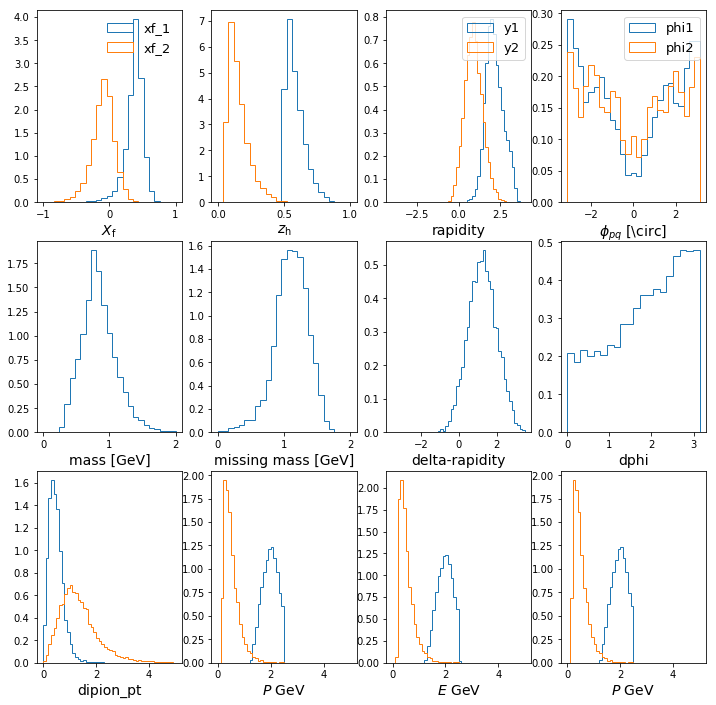

In [28]:
plotHadronVariables(df['Pb'])